### ACTIVITY 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('F:/GreyCampus-Datascience/DS5/Statistics/activity.xlsx')
df

,id,AGE,SEX,HR BL,HR 2W
0,1,46,M,86,92
1,2,44,M,84,88
2,3,45,M,78,83
3,4,64,M,88,90
4,5,58,M,76,80
...,...,...,...,...,...
61,62,50,F,88,94
62,63,52,M,80,84
63,64,42,M,86,90
64,65,40,M,80,88


#### 1. Generate appropriate graphs using Age column. There should be two figures.

<function matplotlib.pyplot.show(close=None, block=None)>

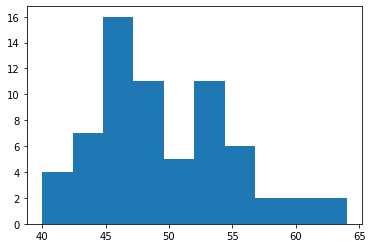

In [3]:
plt.hist(df['AGE'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

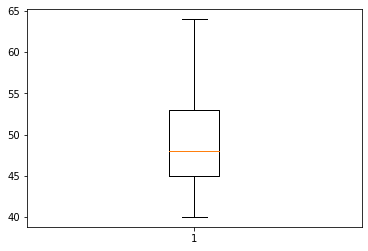

In [5]:
plt.boxplot(df['AGE'])
plt.show

#### 2. Generate appropriate graphs using SEX column

<AxesSubplot:>

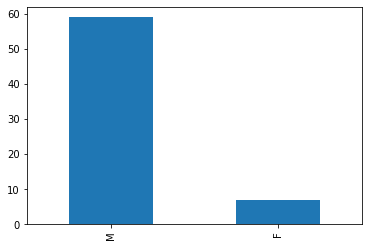

In [26]:
df['SEX'].value_counts().plot(kind='bar')

#### 3. Heart rate (HR) of several COPD patients were checked before giving a medicine. They were asked to take medicines for two weeks and their HR were measured again with a claim that medicine will affect the HR. Please write your null and alternative hypothesis, test statistics, and confidence interval.  Please write your conclusion at the end using P value.

Let us assume that there is no change in Heart Rate before and after medicine.

Null Hypothesis: There is no change in Heart Rate before and after medicine.

Alternate Hypothesis: There is a change in Heart Rate before and after medicine

#### We will use a PAIRED T-Test for the same

In [27]:
from scipy import stats

ttest,pval= stats.ttest_rel(df['HR 2W'], df[' HR BL'])

print("Test Statistic: ", ttest)  
print("P Value: ", pval)

Test Statistic:  8.890584583835
P Value:  7.721216550923285e-13


#### As observed, the p-value is less than 0.05 and hence we can reject the NULL HYPOTHESIS. Hence, we can say that "There is a change in Heart Rate before and after medicine"

#### Please also mentioned that which test will be appropriate.

We will use the Paired T-test as we are considering before and after data.

#### Please also create an appropriate graph to show the differences between HR base line and HR two weeks.

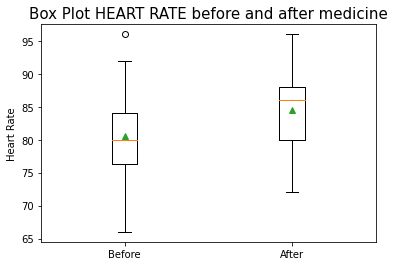

In [39]:
fig, ax = plt.subplots()

ax.set_title("Box Plot HEART RATE before and after medicine", fontsize= 15)


# build a box plot
ax.boxplot([df[' HR BL'], df['HR 2W']], showmeans= True, labels = ['Before', 'After'] )


#xticklabels=['HR BL', 'HR 2W']
#ax.set_xticklabels(xticklabels)

plt.ylabel("Heart Rate")

plt.show()


### ACTIVITY 2

In [31]:
df1 = pd.read_excel('F:/GreyCampus-Datascience/DS5/Statistics/activity2_mod.xlsx')
df1

,FEV1,GROUP
0,67,GRP1
1,56,GRP1
2,71,GRP1
3,65,GRP1
4,72,GRP1
...,...,...
193,79,GRP3
194,88,GRP3
195,78,GRP3
196,85,GRP3


#### 1. FEV test was conducted on several COPD patients and then three difference medicines were given to check its efficacy. Hence, patients were distributed into three different groups. Research claims that there will be difference in FEV among groups. Please write your null and alternative hypothesis, test statistics, and confidence interval.  Which groups differ in their FEV scores. Please write your conclusion at the end using P value.

NULL HYPOTHESIS: There is no difference in FEV among the groups.

ALTERNATE HYPOTHESIS: There is difference in FEV among the groups.

In [33]:
import pingouin as pg

aov = pg.anova(data=df1, dv = 'FEV1', between = ['GROUP'], detailed = True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,GROUP,10818.252525,2,5409.126263,273.123887,2.863802e-57,0.73693
1,Within,3861.909091,195,19.804662,NaN,NaN,NaN


#### As the p value is significant (<0.05), we can reject the Null Hypothesis. Thus, we conclude that "There is a difference in FEV among the groups".

### Carry out pairwise tukey tests as part of Post-hoc analysis

In [34]:
pt = pg.pairwise_tukey(dv='FEV1', between='GROUP', data=df1)
print(pt)

      A     B    mean(A)    mean(B)       diff        se          T  p-tukey  \
0  GRP1  GRP2  64.439394  71.621212  -7.181818  0.774688  -9.270596    0.001   
1  GRP1  GRP3  64.439394  82.424242 -17.984848  0.774688 -23.215607    0.001   
2  GRP2  GRP3  71.621212  82.424242 -10.803030  0.774688 -13.945011    0.001   

     hedges  
0 -1.604475  
1 -4.017958  
2 -2.413483  


#### From the Pairwise Tukey Tests, it is evident that all the groups are statistically different from each other as the P-value is significant in all the Pairwise tests.

#### 2. Please also mention that which test will be appropriate.

Since we are comparing 3 differnt groups, we will use the ONE WAY ANOVA.

#### 3. Please also create an appropriate graph to show the differences between three FEV groups.

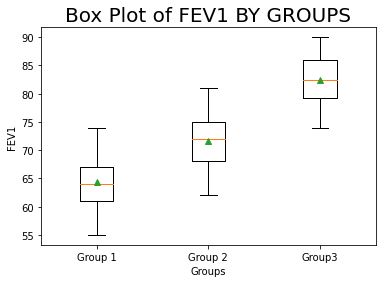

In [38]:
fig, ax = plt.subplots()

ax.set_title("Box Plot of FEV1 BY GROUPS", fontsize= 20)

data = [df1['FEV1'][df1['GROUP'] == 'GRP1'],
        df1['FEV1'][df1['GROUP'] == 'GRP2'],
        df1['FEV1'][df1['GROUP'] == 'GRP3']]

ax.boxplot(data,
           labels= ['Group 1', 'Group 2', 'Group3'],
           showmeans= True)

plt.xlabel("Groups")
plt.ylabel("FEV1")

plt.show()